## 전세사기 의심 확인

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [ ]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [1]:
import pandas as pd
import glob
import os

# CSV 파일들이 들어있는 폴더 경로
csv_folder = "data"

# 해당 폴더 내 모든 CSV 파일 경로 가져오기
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# 각 CSV 파일을 읽어서 리스트로 저장
dfs = [pd.read_csv(file, encoding='cp949', skiprows=15) for file in csv_files]

# 병합
df_trade = pd.concat(dfs, ignore_index=True)

In [2]:
# CSV 파일들이 들어있는 폴더 경로
# 서울시부동산실거래가정보
csv_folder = "data2"

# 해당 폴더 내 모든 CSV 파일 경로 가져오기
csv_files2 = glob.glob(os.path.join(csv_folder, "*.csv"))

# 각 CSV 파일을 읽어서 리스트로 저장
dfs2 = [pd.read_csv(file, encoding='cp949') for file in csv_files2]

# 병합
df_trade2 = pd.concat(dfs2, ignore_index=True)

/var/folders/zp/1pcpd5jd2xd5jl9gpvk8f9mw0000gn/T/ipykernel_2642/306677837.py:9: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs2 = [pd.read_csv(file, encoding='cp949') for file in csv_files2]


In [3]:
# 데이터 확인
print(f"병합된 파일 수: {len(csv_files)}")
print(f"총 거래 건수: {len(df_trade)}")
print(f"병합된 파일 수: {len(csv_files2)}")
print(f"총 거래 건수: {len(df_trade2)}")
df_trade.head()

병합된 파일 수: 12
총 거래 건수: 228851
병합된 파일 수: 3
총 거래 건수: 208169


,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,중개사소재지,등기일자,주택유형,도로조건,연면적(㎡),대지면적(㎡),매수,매도,건물명,대지권면적(㎡)
0,1,서울특별시 중구 신당동,851,851.0,0.0,래미안하이베르,84.9800,202504,14,"134,700",...,서울 중구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,서울특별시 도봉구 방학동,271-1,271.0,1.0,신동아아파트1,53.1600,202504,14,"35,800",...,서울 도봉구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,서울특별시 금천구 시흥동,1013,1013.0,0.0,관악산벽산타운5,84.9700,202504,14,"51,000",...,서울 금천구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,서울특별시 마포구 아현동,777,777.0,0.0,마포래미안푸르지오2단지,59.9656,202504,14,"187,000",...,서울 마포구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,서울특별시 마포구 아현동,777,777.0,0.0,마포래미안푸르지오3단지,114.7267,202504,14,"242,500",...,서울 마포구,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import sqlite3
import pandas as pd

# DB 연결
conn = sqlite3.connect('real_estate_final.db')

# 테이블 전체 불러오기 (예: users 테이블)
df_origin = pd.read_sql_query("SELECT * FROM house", conn)

# 연결 종료
conn.close()

OperationalError: unable to open database file

In [ ]:
df = df_origin

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50840 entries, 0 to 50839
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_id            50840 non-null  int64 
 1   title               50840 non-null  object
 2   price               50840 non-null  object
 3   address             50840 non-null  object
 4   floor               50840 non-null  object
 5   deposit_type        50840 non-null  object
 6   management_fee      50840 non-null  object
 7   availabe_from       50840 non-null  object
 8   house_num           50840 non-null  object
 9   agent_comm          50840 non-null  object
 10  agent_info          50840 non-null  object
 11  rooms_count         50840 non-null  object
 12  options             50840 non-null  object
 13  posted_at           50840 non-null  object
 14  gu                  50840 non-null  object
 15  dong                50840 non-null  object
 16  img_url             50

In [ ]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228851 entries, 0 to 228850
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NO        228851 non-null  int64  
 1   시군구       228851 non-null  object 
 2   번지        228840 non-null  object 
 3   본번        217885 non-null  float64
 4   부번        217885 non-null  float64
 5   단지명       175102 non-null  object 
 6   전용면적(㎡)   217885 non-null  float64
 7   계약년월      228851 non-null  int64  
 8   계약일       228851 non-null  int64  
 9   거래금액(만원)  228851 non-null  object 
 10  동         156581 non-null  object 
 11  층         217885 non-null  float64
 12  매수자       199364 non-null  object 
 13  매도자       199364 non-null  object 
 14  건축년도      228503 non-null  float64
 15  도로명       228741 non-null  object 
 16  해제사유발생일   228851 non-null  object 
 17  거래유형      228851 non-null  object 
 18  중개사소재지    228851 non-null  object 
 19  등기일자      199364 non-null  object 
 20  건물명 

In [ ]:
import re
import pandas as pd

def parse_price_column(df, col='price'):
    def parse_price(text):
        try:
            # 문자열 전처리: 콤마 제거, 공백 제거, \xa0 제거
            text = str(text).replace(",", "").replace(" ", "").replace("\xa0", "")

            # 월세 or 단기임대 패턴
            if text.startswith("월세") or text.startswith("단기임대"):
                match = re.search(r'(?:월세|단기임대)(\d+억)?(\d+)?/(\d+)', text)
                if match:
                    deposit = 0
                    # '2억 5000'처럼 구성된 보증금
                    if match.group(1):  # ex. '2억'
                        deposit += int(match.group(1).replace("억", "")) * 10000
                    if match.group(2):  # ex. '5000'
                        deposit += int(match.group(2))
                    deposit *= 10000  # 만원 → 원 단위

                    # 월세
                    rent = int(match.group(3)) * 10000
                    return deposit, rent

            # 전세 패턴
            elif text.startswith("전세"):
                match = re.search(r'전세(\d+억)?(\d+)?', text)
                if match:
                    deposit = 0
                    if match.group(1):
                        deposit += int(match.group(1).replace("억", "")) * 10000
                    if match.group(2):
                        deposit += int(match.group(2))
                    deposit *= 10000
                    return deposit, 0
        except:
            pass
        return None, None

    # 적용
    df[['보증금', '월세']] = df[col].apply(lambda x: pd.Series(parse_price(x)))
    return df

In [ ]:
df = parse_price_column(df)

In [ ]:
df[['보증금','월세']]

,보증금,월세
0,250000000,800000
1,200000000,1500000
2,950000000,0
3,330000000,700000
4,200000000,3200000
...,...,...
50835,180000000,0
50836,160000000,0
50837,10000000,670000
50838,20000000,200000


In [ ]:
# 월세 -> 전세 변환
# 최종적으로 전세환산금액컬럼으로 전세가율 계산하면 됨!!
# 전월세 구역별 전환율
gu_rate = {
    # 도심권 (5.3%)
    '종로구': 5.3, '중구': 5.3, '용산구': 5.3,
    # 동북권 (5.1%)
    '성동구': 5.1, '광진구': 5.1, '동대문구': 5.1, '중랑구': 5.1,
    '성북구': 5.1, '강북구': 5.1, '도봉구': 5.1, '노원구': 5.1,
    # 서북권 (5.1%)
    '은평구': 5.1, '서대문구': 5.1, '마포구': 5.1,
    # 서남권 (4.8%)
    '양천구': 4.8, '강서구': 4.8, '구로구': 4.8, '금천구': 4.8,
    '영등포구': 4.8, '동작구': 4.8, '관악구': 4.8,
    # 동남권 (4.3%)
    '서초구': 4.3, '강남구': 4.3, '송파구': 4.3, '강동구': 4.3,
}

df['전환율'] = df['gu'].map(gu_rate)

# 월세 환산 전세금 = 보증금 + (월세 * 12 / 전환율)
# 단기임대 처리 어케할지
mask_wolse = (df['deposit_type'] == '월세')
df.loc[mask_wolse, '전세환산금액'] = df.loc[mask_wolse, '보증금'] + (
    df.loc[mask_wolse, '월세'] * 12 / df.loc[mask_wolse, '전환율']
)

# 전세는 기존 보증금 사용
mask_jeonse = df['deposit_type'] == '전세'
df.loc[mask_jeonse, '전세환산금액'] = df.loc[mask_jeonse, '보증금']

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:
df['전세환산금액'].sample(10)

,전세환산금액
25719,"11,841,860.47"
13817,"11,764,705.88"
9272,"270,000,000.00"
38130,"4,875,000.00"
31708,"300,375,000.00"
22477,"50,941,176.47"
30948,"57,500,000.00"
44931,"4,058,823.53"
44011,"11,647,058.82"
22141,"51,176,470.59"


In [ ]:
# 매매가 데이터 int 변환
df_trade['거래금액(만원)'] = (
    df_trade['거래금액(만원)']
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .astype(int)
)

df_trade2['물건금액(만원)'] = (
    df_trade2['물건금액(만원)']
    .astype(str)
    .str.replace(",", "")
    .str.strip()
    .astype(int)
)

In [ ]:
df_trade2.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '지번구분', '지번구분명', '본번', '부번',
       '건물명', '계약일', '물건금액(만원)', '건물면적(㎡)', '토지면적(㎡)', '층', '권리구분', '취소일',
       '건축년도', '건물용도', '신고구분', '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [ ]:
import re

def parse_area_column(df, col='area_size'):
    def parse_area(area_text):
        try:
            text = str(area_text).strip()
            # '49.9㎡', '80.3㎡/60.2㎡', '-㎡/49.9㎡', 등에서 '㎡' 숫자만 추출
            matches = re.findall(r'([\d.]+)㎡', text)
            if matches:
                return float(matches[-1])
        except:
            pass
        return None

    df = df.copy()
    df['전용면적'] = df[col].apply(parse_area)
    return df

In [ ]:
df = parse_area_column(df)

In [ ]:
df['전용면적']

,전용면적
0,33.18
1,49.86
2,49.90
3,49.86
4,49.92
...,...
50835,27.33
50836,26.01
50837,28.50
50838,19.80


## 1단계 : title과 건물명 비교

In [ ]:
# df_trade: 건물명 or 단지명
df_trade['건물키'] = df_trade['건물명']
df_trade.loc[df_trade['건물키'].isna() | (df_trade['건물키'].str.strip() == ''), '건물키'] = df_trade['단지명']
df_trade['건물키'] = df_trade['건물키'].fillna('').str.strip()

# df_trade2: 건물명만 사용
df_trade2['건물키'] = df_trade2['건물명'].fillna('').str.strip()

In [ ]:
import re

def extract_building_name(title):
    title = str(title)
    title = re.sub(r'\d+동\d+층', '', title)
    title = re.sub(r'\d+동[가-힣]*층', '', title)
    title = re.sub(r'\d+동', '', title)
    title = re.sub(r'\d+층', '', title)
    title = re.sub(r'\([^)]*\)', '', title)
    return title.strip()

df['건물키'] = df['title'].apply(extract_building_name)

In [ ]:
df['건물키'].head(10)

,건물키
0,대치2단지
1,대치2단지
2,래미안블레스티지
3,대치2단지
4,개포래미안포레스트
5,대치2단지
6,개포자이프레지던스
7,래미안블레스티지
8,래미안블레스티지
9,래미안블레스티지


In [ ]:
df_merge1 = df.merge(df_trade, on='건물키', how='left', suffixes=('', '_trade'))
df_merge1['비교면적'] = df_merge1['전용면적(㎡)'].fillna(df_merge1['연면적(㎡)'])
df_merge1['면적차이'] = abs(df_merge1['전용면적'] - df_merge1['비교면적'])
df_filtered1 = df_merge1[df_merge1['면적차이'] <= 1.0].copy()
df_filtered1['매매가'] = df_filtered1['거래금액(만원)'] * 10000

In [ ]:
df_merge2 = df.merge(df_trade2, on='건물키', how='left', suffixes=('', '_trade2'))
df_merge2['비교면적'] = df_merge2['건물면적(㎡)']
df_merge2['면적차이'] = abs(df_merge2['전용면적'] - df_merge2['비교면적'])
df_filtered2 = df_merge2[df_merge2['면적차이'] <= 1.0].copy()
df_filtered2['매매가'] = df_filtered2['물건금액(만원)'] * 10000

In [ ]:
df_matched = pd.concat([df_filtered1[['title', '매매가']], df_filtered2[['title', '매매가']]])
df_matched = df_matched.dropna().drop_duplicates(subset='title')

In [ ]:
df = df.merge(df_matched, on='title', how='left')
df.rename(columns={'매매가': '매매가_1차'}, inplace=True)

In [ ]:
df[['건물키', '전용면적', '매매가_1차']].dropna().sample(10, random_state=42)

,건물키,전용면적,매매가_1차
47426,명동아르누보센텀,27.72,"322,500,000.00"
32266,도시형생활주택,12.96,"153,000,000.00"
45850,은평뉴타운솔하임,28.04,"220,000,000.00"
49086,용마한신,35.44,"365,000,000.00"
19623,써밋파크,19.06,"280,000,000.00"
2970,청담자이,49.63,"2,350,000,000.00"
9782,더아모르,26.53,"280,000,000.00"
34544,메이준,17.44,"100,000,000.00"
28022,현대월드타워,38.22,"245,000,000.00"
25349,헬리오시티,39.10,"1,415,000,000.00"


In [ ]:
df['매매가_1차'].isna().sum() # 건물명으로 매칭되지 않은 데이터 개수 -> 45250개 ,,,,,

np.int64(45250)

In [ ]:
df[df['deposit_type']!='단기임대'] # 전체(단기임대제외) 데이터 개수 -> 50038개

,house_id,title,price,address,floor,deposit_type,management_fee,availabe_from,house_num,agent_comm,...,house_feature,house_explanations,apt_name,보증금,월세,전환율,전세환산금액,전용면적,건물키,매매가_1차
0,1,대치2단지 215동11층,"월세2억 5,000/80",주소 정보 없음,11/15층,월세,14만원,2025년 6월 15일,2524646572,최대 99만원,...,최고급 올수리 장기거주가능 답사환영,★대치2단지. 대청아파트 전문 !!★\n\n 【 박사공인중개사 】\n ☎ 010...,대치2단지,250000000,800000,4.30,"252,232,558.14",33.18,대치2단지,NaN
1,2,대치2단지 213동3층,월세2억/150,주소 정보 없음,3/15층,월세,22만원,2025년 7월 1일 협의가능,2524647274,최대 105만원,...,21p. 시설특 올수리 입주조절 남향 융자무,★대치2단지. 대청아파트 전문 !!★\n\n 【 박사공인중개사 】\n ☎ 010...,대치2단지,200000000,1500000,4.30,"204,186,046.51",49.86,대치2단지,NaN
2,3,래미안블레스티지 218동6층,"전세9억 5,000(4,634만원/3.3㎡)",주소 정보 없음,6/16층,전세,20만원,즉시입주 협의가능,2524675697,최대 380만원,...,"20 ,안정적인정원뷰,거실이 넓어요,조중식,세대창고","◆ 개포 래미안 블레스티지 ◆\n\n총 세대수: 1,957세대 (74개동)\n\n평...",래미안블레스티지,950000000,0,4.30,"950,000,000.00",49.90,래미안블레스티지,"2,100,000,000.00"
3,4,대치2단지 218동7층,"월세3억 3,000/70",주소 정보 없음,7/15층,월세,18만원,2025년 6월 10일 협의가능,2524611184,최대 120만원,...,21 공동 남향전면동 일부수리해드림 보증금대출,"**전화상담, 방문상담 환영합니다**",대치2단지,330000000,700000,4.30,"331,953,488.37",49.86,대치2단지,NaN
4,5,개포래미안포레스트 102동10층,월세2억/320,주소 정보 없음,10/16층,월세,22만원,즉시입주 협의가능,2524643821,최대 156만원,...,22.투룸실속형.최고의커뮤니티시설.호텔식조중식서비스.숲속에위치.판상형,▣개포동의 모든것! 오랜 전통의 새방 단지내부동산입니다.\n◈단지내 중심부에 위치한...,개포래미안포레스트,200000000,3200000,4.30,"208,930,232.56",49.92,개포래미안포레스트,"2,040,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50835,296,빌라4층,"전세1억 8,000(1,789만원/3.3㎡)",서울시 관악구 봉천동 180-534,4/6층,전세,10만원,즉시입주 협의가능,2524573637,최대 54만원,...,낙성대 애완가능 초특가 투룸 정말 괜찮은 매물입니다,💖 매 물 정 보 💖\n\n⚠중개 의뢰인이 관리비 세부내역 미제시로 비목별 금액 미...,빌라,180000000,0,4.80,"180,000,000.00",27.33,빌라,NaN
50836,297,단독1층,"전세1억 6,000",서울시 관악구 봉천동 691-22,1/3층,전세,8만원,즉시입주,2524575752,최대 48만원,...,-,"고객님들에게 약속드립니다!\n고객님들이 저희에게 주시는 시간을 아깝지않게, 고객님의...",단독,160000000,0,4.80,"160,000,000.00",26.01,단독,NaN
50837,298,단독3층,"월세1,000/67",서울시 관악구 봉천동 691-22,3/3층,월세,8만원,즉시입주,2524576375,"최대 30만 8,000원",...,-,"고객님들에게 약속드립니다!\n고객님들이 저희에게 주시는 시간을 아깝지않게, 고객님의...",단독,10000000,670000,4.80,"11,675,000.00",28.50,단독,NaN
50838,299,일반원룸저층,"월세2,000/20",서울시 관악구 봉천동 1689-16,저/3층,월세,12만원,즉시입주,2524589926,최대 17만원,...,"낙성대역 초역세권, 가성비 최고 즉시입주 가능한 풀옵션 원룸",【 상세 설명 】\n\n▶ 시세 대비 나쁘지 않은 가격\n▶ 연식 대비 깔끔한 상태...,일반원룸저층,20000000,200000,4.80,"20,500,000.00",19.80,일반원룸저층,NaN


## 2단계 : address에서 추출한 번지수와 번지 컬럼 비교

In [ ]:
import re

def extract_full_bunji(text):
    match = re.search(r'(\d+-\d+|\d+)', str(text))
    return match.group(1) if match else None

df['번지'] = df['address'].apply(extract_full_bunji)

In [ ]:
# df_trade2 번지수 생성
# 1. 문자열로 만들고 앞뒤 공백 제거
df_trade2['본번'] = df_trade2['본번'].astype(str).str.strip()
df_trade2['부번'] = df_trade2['부번'].astype(str).str.strip()

# 2. 숫자만 추출 (문자 제거), NaN이나 공백은 '0'으로
df_trade2['본번'] = df_trade2['본번'].str.extract(r'(\d+)')[0].fillna('0')
df_trade2['부번'] = df_trade2['부번'].str.extract(r'(\d+)')[0].fillna('0')

# 3. 정수로 변환 후 문자열로 변환 (leading zero 제거)
df_trade2['본번'] = df_trade2['본번'].astype(int).astype(str)
df_trade2['부번'] = df_trade2['부번'].astype(int).astype(str)

In [ ]:
df_trade2['번지'] = df_trade2['본번'].astype(str) + '-' + df_trade2['부번'].astype(str)

In [ ]:
df_trade2['번지'].sample(10)

,번지
83337,716-46
42636,1353-0
191947,860-0
59672,1002-15
145709,1487-1
121856,127-14
129666,238-12
8729,597-0
8450,323-0
179489,720-1


In [ ]:
df['번지'] = df['번지'].astype(str).str.strip()
df_trade['번지'] = df_trade['번지'].astype(str).str.strip()
df_trade2['번지'] = df_trade2['번지'].astype(str).str.strip()

In [ ]:
df_merge_b1 = df.merge(df_trade, on='번지', how='left')
df_merge_b1['비교면적'] = df_merge_b1['전용면적(㎡)'].fillna(df_merge_b1['연면적(㎡)'])
df_merge_b1['면적차이'] = abs(df_merge_b1['전용면적'] - df_merge_b1['비교면적'])
df_filtered_b1 = df_merge_b1[df_merge_b1['면적차이'] <= 1.0].copy()
df_filtered_b1['매매가_2차'] = df_filtered_b1['거래금액(만원)'] * 10000

In [ ]:
df_merge_b2 = df.merge(df_trade2, on='번지', how='left')
df_merge_b2['비교면적'] = df_merge_b2['건물면적(㎡)']
df_merge_b2['면적차이'] = abs(df_merge_b2['전용면적'] - df_merge_b2['비교면적'])
df_filtered_b2 = df_merge_b2[df_merge_b2['면적차이'] <= 1.0].copy()
df_filtered_b2['매매가_2차'] = df_filtered_b2['물건금액(만원)'] * 10000

In [ ]:
df_bunji_matched = pd.concat([
    df_filtered_b1[['title', '매매가_2차']],
    df_filtered_b2[['title', '매매가_2차']]
]).dropna().drop_duplicates(subset='title')

# 기존 df_j에 병합
df = df.merge(df_bunji_matched, on='title', how='left')

In [ ]:
print(df[['title', '전용면적', '번지', '매매가_2차']].dropna().sample(10))

                 title  전용면적       번지         매매가_2차
3247              단독1층 46.00     None 343,000,000.00
17337            다가구2층 27.00    180-8 270,000,000.00
17269           다가구B1층 35.00    1-644  60,000,000.00
36789        도시형생활주택2층 13.02   276-32 560,000,000.00
23136             단독1층 33.00        1 343,000,000.00
26805  빌라 빌라드그리움 석촌 중층 43.78      256 390,000,000.00
15024            다가구2층 16.53   274-14 270,000,000.00
16287             빌라2층 36.06   433-30 440,000,000.00
9822              빌라중층 47.80    345-9 450,000,000.00
50457           오피스텔4층 14.48  1460-43  84,000,000.00


In [ ]:
df['매매가_2차'].isna().sum() # 번지수로 매칭되지 않은 데이터 : 21812개

np.int64(21812)

In [ ]:
null_rows = df[df['매매가_1차'].isna() & df['매매가_2차'].isna()]
print("매매가_1차, 2차 모두 NaN인 행 개수:", len(null_rows)) # 매매가 안 채워진 데이터 16657개

매매가_1차, 2차 모두 NaN인 행 개수: 16657


In [ ]:
null_rows[['title', '전용면적', '번지']].sample(10)

,title,전용면적,번지
50407,도시형생활주택6층,23.48,1458-6
10254,청량리역렉스프라임 1동고층,37.80,None
43262,DK밸리뷰용산 1동6층,29.76,None
28778,신트리4단지 403동14층,49.80,None
49878,베네스트로프트 101동저층,29.89,None
43090,용산토투밸리 1동11층,47.99,None
4007,빌라 브리즈4층,23.87,180
6594,일반원룸 도시형생활주택 마이바움 5층,12.33,41-56
10111,청량리역렉스프라임 1동8층,18.44,None
38710,미림퀸즈빌(민간임대) 1동6층,29.94,None


## 3단계 : building_type별, 동별 평균 매매가 계산

In [ ]:
# df_trade 평균 거래가
# 시군구 컬럼 분리
df_trade[['시', '자치구명', '법정동명']] = df_trade['시군구'].str.split(' ', n=2, expand=True)
df_trade['법정동명'] = df_trade['법정동명'].str.split(' ').str[0]
df_trade['거래금액(만원)'] = df_trade['거래금액(만원)'].replace(',', '', regex=True).astype(float)

In [ ]:
avg_trade = df_trade.groupby(['자치구명', '법정동명'])['거래금액(만원)'].mean().reset_index()
avg_trade.columns = ['gu', 'dong', '평균거래금액(만원)']

In [ ]:
# df_trade2 평균 거래가
avg_price = df_trade2.groupby(['자치구명', '법정동명'])['물건금액(만원)'].mean().reset_index()
avg_price.columns = ['gu', 'dong', '평균물건금액(만원)']

In [ ]:
# df_trade 평균 + df_trade2 평균
df_merged = pd.concat([
    df_trade2[['자치구명', '법정동명', '물건금액(만원)']].rename(columns={'물건금액(만원)': '거래금액(만원)'}),
    df_trade[['자치구명', '법정동명', '거래금액(만원)']]
])

# 다시 평균 계산
avg_combined = df_merged.groupby(['자치구명', '법정동명'])['거래금액(만원)'].mean().reset_index()
avg_combined.columns = ['gu', 'dong', '평균거래금액_만원']
avg_combined['평균거래금액_만원'] *= 10000

In [ ]:
df = df.merge(avg_combined, how='left', on=['gu', 'dong'])

In [ ]:
df[['gu', 'dong', '평균거래금액_만원']].sample(10)

,gu,dong,평균거래금액_만원
18788,서초구,반포동,"3,542,062,595.81"
15912,마포구,염리동,"1,332,305,685.00"
14613,마포구,서교동,"729,676,958.53"
795,강남구,대치동,"2,619,532,221.23"
26969,송파구,석촌동,"471,364,790.29"
12105,동작구,사당동,"867,790,358.52"
6817,강서구,내발산동,"698,082,476.76"
37790,구로구,오류동,"350,308,322.98"
27344,송파구,신천동,"2,247,779,233.26"
33493,영등포구,영등포동2가,"289,296,666.67"


In [ ]:
# 1차, 2차가 모두 NaN인 행에 평균거래금액_만원을 매매가_3차에 대입
condition = df['매매가_1차'].isna() & df['매매가_2차'].isna()

df.loc[condition, '매매가_3차'] = df.loc[condition, '평균거래금액_만원']

In [ ]:
df[['title', '전용면적', '번지', '매매가_1차', '매매가_2차', '매매가_3차']].sample(10)

,title,전용면적,번지,매매가_1차,매매가_2차,매매가_3차
22826,성신여대역솔하임(도시형) 1동11층,15.94,None,"240,000,000.00",NaN,NaN
23185,다가구B1층,48.00,2,NaN,"60,000,000.00",NaN
11856,일반원룸2층,15.00,48-15,NaN,"340,000,000.00",NaN
8245,블루힐(주상복합) 1동7층,12.18,None,NaN,NaN,"369,525,235.56"
34980,빌라고층,26.99,355,NaN,"450,000,000.00",NaN
31181,일반원룸3층,26.50,95-243,NaN,"504,000,000.00",NaN
22889,돈암메트로빌 1동중층,28.47,None,NaN,NaN,"317,222,315.79"
3927,올림픽파크포레온 318동고층,49.95,None,"1,300,010,000.00",NaN,NaN
4218,상가주택중층,40.00,335-9,NaN,"340,000,000.00",NaN
27593,빌라3층,36.66,246-13,NaN,"620,000,000.00",NaN


## 4단계 : 전세가율 계산

In [ ]:
df['전세환산금액'] = df['전세환산금액'].astype(float)

In [ ]:
df['매매가_최종'] = df['매매가_1차'].combine_first(df['매매가_2차']).combine_first(df['매매가_3차'])
df['전세가율'] = df['전세환산금액'] / df['매매가_최종']
df['전세가율_이상'] = df['전세가율'] > 0.8

In [ ]:
df['전세가율_이상'].sum()

np.int64(3976)

<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-55-c6a1356f6b61>:13: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-

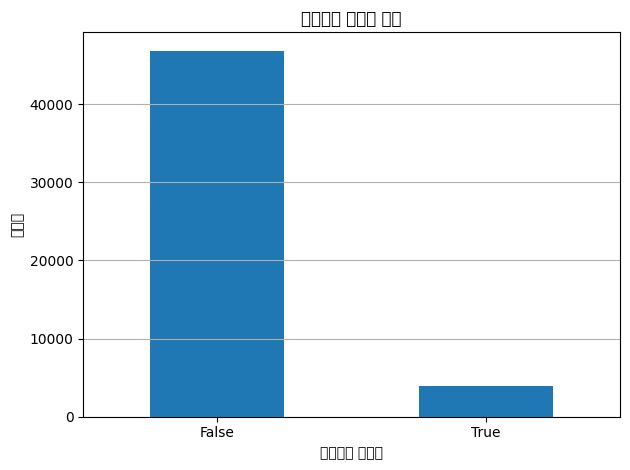

In [ ]:
import matplotlib.pyplot as plt

# True/False 개수 집계
counts = df['전세가율_이상'].value_counts()

# 시각화
counts.plot(kind='bar')
plt.title('전세가율 이상치 분포')
plt.xlabel('전세가율 이상치')
plt.ylabel('매물수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df[(df['전세가율_이상'] == True) & (df['매매가_3차'].notna())].shape[0]

474

In [ ]:
import sqlite3

# ✅ 1. 병합 키 생성 (전세 df와 전체 df 모두)
df['매칭키'] = df['title'].astype(str).str.strip() + '_' + df['house_explanations'].astype(str) + '_' + df['options'].astype(str) + '_' + df['house_feature'].astype(str) + '_' + df['house_num'].astype(str) + '_' + df['agent_info'].astype(str) + '_' + df['posted_at'].astype(str) + '_' + df['house_id'].astype(str)
df_origin['매칭키'] = df_origin['title'].astype(str).str.strip() + '_' + df_origin['house_explanations'].astype(str) + '_' + df_origin['options'].astype(str) + '_' + df_origin['house_feature'].astype(str) + '_' + df_origin['house_num'].astype(str) + '_' + df['agent_info'].astype(str) + '_' + df['posted_at'].astype(str) + '_' + df['house_id'].astype(str)

# ✅ 2. 전세 매물의 전세가율_이상 정보만 추출
jeonse_flag = df[['매칭키', '전세가율_이상']]

# 병합하기 전에 매칭키 기준으로 중복 제거
df_unique = df[['매칭키', '전세가율_이상']].drop_duplicates(subset='매칭키')


In [ ]:
df.columns

Index(['house_id', 'title', 'price', 'address', 'floor', 'deposit_type',
       'management_fee', 'availabe_from', 'house_num', 'agent_comm',
       'agent_info', 'rooms_count', 'options', 'posted_at', 'gu', 'dong',
       'img_url', 'area_size', 'direction', 'built_date', 'parking',
       'building_type', 'house_feature', 'house_explanations', 'apt_name',
       '보증금', '월세', '전환율', '전세환산금액', '전용면적', '건물키', '매매가_1차', '번지', '매매가_2차',
       '평균거래금액_만원', '매매가_3차', '매매가_최종', '전세가율', '전세가율_이상', '매칭키'],
      dtype='object')

In [ ]:
# ✅ 3. 전체 데이터에 병합 (left join: 기존 df_origin 유지)
df_total = df_origin.merge(jeonse_flag, on='매칭키', how='left')

# ✅ 4. 병합 후 필요 없어진 매칭키 컬럼 제거
df_total.drop(columns=['매칭키'], inplace=True)

# ✅ 5. SQLite DB로 저장
output_path = 'real_estate_with_fflag.db'
conn = sqlite3.connect(output_path)
df_total.to_sql('house', conn, index=False, if_exists='replace')
conn.close()

print("전세가율_이상 병합 완료 및 DB 저장 완료")

전세가율_이상 병합 완료 및 DB 저장 완료
